<a href="https://colab.research.google.com/github/slidemorning/vision/blob/master/image_segmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import os
import re
from PIL import Image
import shutil
import random
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
import gdown

url = 'https://drive.google.com/uc?id=1fwUhH1JLOMEIzBIcuEDQy2K9_zSdsyXu'
fname = 'oxford_pet.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1fwUhH1JLOMEIzBIcuEDQy2K9_zSdsyXu
To: /content/oxford_pet.zip
823MB [00:04, 197MB/s]


'oxford_pet.zip'

In [4]:
!ls -al

total 803600
drwxr-xr-x 1 root root      4096 Nov 13 09:27 .
drwxr-xr-x 1 root root      4096 Nov 13 09:23 ..
drwxr-xr-x 1 root root      4096 Nov  6 17:30 .config
-rw-r--r-- 1 root root 822863549 Nov 13 09:27 oxford_pet.zip
drwxr-xr-x 1 root root      4096 Nov  6 17:30 sample_data


In [5]:
!unzip -q oxford_pet.zip -d oxford_pet

In [10]:
!ls oxford_pet/annotations/

list.txt  README  test.txt  trainval.txt  trimaps  xmls


In [11]:
curr_dir = os.getcwd()
data_dir = os.path.join(curr_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

print(curr_dir)
print(data_dir)
print(image_dir)
print(seg_dir)

/content
/content/oxford_pet
/content/oxford_pet/images
/content/oxford_pet/annotations/trimaps


In [14]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files)), print(image_files[0])

7390
havanese_190.jpg


(None, None)

In [15]:
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']
print(len(seg_files)), print(seg_files[0])

7390
german_shorthaired_49.png


(None, None)

In [16]:
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    seg_file = os.path.splitext(image_file)[0] + '.png'
    seg_path = os.path.join(seg_dir, seg_file)
    image = Image.open(image_path)
    image_mode = image.mode
    if image_mode != 'RGB':
        print(image_file, image_mode)
        image = np.array(image)
        print(image.shape)
        os.remove(image_path)
        os.remove(seg_path)

Egyptian_Mau_14.jpg RGBA
(800, 582, 4)
staffordshire_bull_terrier_22.jpg L
(500, 364)
staffordshire_bull_terrier_2.jpg L
(282, 500)
Egyptian_Mau_177.jpg P
(175, 246)
Egyptian_Mau_191.jpg P
(214, 300)
Egyptian_Mau_139.jpg P
(250, 350)
Egyptian_Mau_145.jpg P
(188, 216)
Egyptian_Mau_129.jpg L
(325, 299)
Abyssinian_34.jpg P
(202, 250)
Egyptian_Mau_186.jpg RGBA
(275, 183, 4)
Abyssinian_5.jpg RGBA
(150, 200, 4)
Egyptian_Mau_167.jpg P
(275, 183)


In [18]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7378


In [19]:
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']
print(len(seg_files)), print(seg_files[0])

7378
german_shorthaired_49.png


(None, None)

In [20]:
class_list = set()
for image_file in image_files:
    fname = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+', '', fname)
    class_list.add(class_name)
class_list = list(class_list)
print(len(class_list))

37


In [21]:
class_list.sort()
class_list

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [22]:
class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [24]:
print(class2idx['Bengal'])

1


In [26]:
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
!ls $data_dir

annotations  images  __MACOSX  train  validation


In [27]:
# Split dataset
# Train data, validation data

image_files.sort()

cnt = 0
prev_class_name = ''

for image_file in image_files:
    fname = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+', '', fname)
    if class_name == prev_class_name:
        cnt += 1
    else:
        cnt = 1
    if cnt <= 160:
        path = train_dir
    else:
        path = validation_dir
    image_path = os.path.join(image_dir, image_file)
    shutil.copy(image_path, path)
    prev_class_name = class_name


In [28]:
train_images = os.listdir(train_dir)
validation_images = os.listdir(validation_dir)

print(len(train_images)), print(len(validation_images))

5920
1458


(None, None)

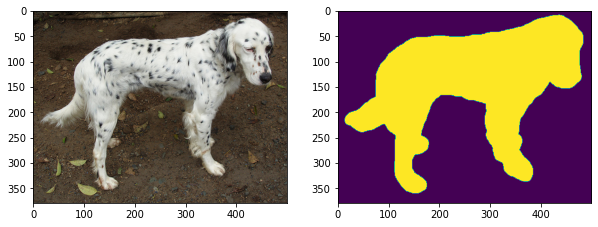

In [43]:
vf_names = os.listdir(validation_dir)
rnd_idx = random.randint(0, len(vf_names)-1)
fname = vf_names[rnd_idx]

vf_path = os.path.join(validation_dir, fname)
image = Image.open(vf_path)
image = np.array(image)

seg_name = os.path.splitext(fname)[0] + '.png'
seg_path = os.path.join(seg_dir, seg_name)
seg_image = Image.open(seg_path)
seg_image = np.array(seg_image)
# from 1:foreground, 2:background, 3:not classified (trimap)
# to   0:background, 1:foreground & not classified  (bimap)
seg_image[seg_image > 2] = 1 
seg_image[seg_image == 2] = 0

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_image)
plt.show()

In [44]:
IMG_SIZE = 224
N_TRAIN = len(train_images)
N_VALIDATION = len(validation_images)

In [46]:
tfr_dir = os.path.join(data_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'seg_train.tfr')
tfr_validation_dir = os.path.join(tfr_dir, 'seg_validation.tfr')

!ls $data_dir

annotations  images  __MACOSX  tfrecord  train	validation


In [47]:
train_writer = tf.io.TFRecordWriter(tfr_train_dir)
validation_writer = tf.io.TFRecordWriter(tfr_validation_dir)

In [50]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
    """Returns a byte_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns a int64_list from a boll / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


In [53]:
n_train = 0

train_files = os.listdir(train_dir)

for train_file in train_files:
    
    train_path = os.path.join(train_dir, train_file)
    image = Image.open(train_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    file_name = os.path.splitext(train_file)[0]
    class_name = re.sub('_\d+', '', file_name)
    class_num = class2idx[class_name]

    if file_name[0].islower():
        bi_class_num = 0
    else:
        bi_class_num = 1

    seg_name = file_name + '.png'
    seg_path = os.path.join(seg_dir, seg_name)
    seg_image = Image.open(seg_path)
    seg_image = seg_image.resize((IMG_SIZE, IMG_SIZE))
    seg_image = np.array(seg_image)
    seg_image[seg_image>2] = 1
    seg_image[seg_image==2] = 0
    seg_bimage = seg_image.tobytes()

    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(bimage),
        'class_num': _int64_feature(class_num),
        'bi_class_num': _int64_feature(bi_class_num),
        'seg_image': _bytes_feature(seg_bimage)
    }))

    train_writer.write(example.SerializeToString())
    n_train += 1

train_writer.close()
print(n_train)

5920


In [54]:
n_validation = 0

validation_files = os.listdir(validation_dir)

for validation_file in validation_files:
    
    validation_path = os.path.join(validation_dir, validation_file)
    image = Image.open(validation_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    file_name = os.path.splitext(validation_file)[0]
    class_name = re.sub('_\d+', '', file_name)
    class_num = class2idx[class_name]

    if file_name[0].islower():
        bi_class_num = 0
    else:
        bi_class_num = 1

    seg_name = file_name + '.png'
    seg_path = os.path.join(seg_dir, seg_name)
    seg_image = Image.open(seg_path)
    seg_image = seg_image.resize((IMG_SIZE, IMG_SIZE))
    seg_image = np.array(seg_image)
    seg_image[seg_image>2] = 1
    seg_image[seg_image==2] = 0
    seg_bimage = seg_image.tobytes()

    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(bimage),
        'class_num': _int64_feature(class_num),
        'bi_class_num': _int64_feature(bi_class_num),
        'seg_image': _bytes_feature(seg_bimage)
    }))

    validation_writer.write(example.SerializeToString())
    n_validation += 1

validation_writer.close()
print(n_validation)

1458


In [55]:
N_TRAIN = len(train_images)
N_VALIDATION = len(validation_images)
## Hyper parameters
N_CLASS = len(class_list)
N_EPOCHS = 20
N_BATCH = 40
IMG_SIZE = 224
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VALIDATION / N_BATCH))

In [58]:
def _parse_function(tfrecord_serialized):
    
    features={
        'image': tf.io.FixedLenFeature([], tf.string),
        'class_num': tf.io.FixedLenFeature([], tf.int64),
        'bi_class_num': tf.io.FixedLenFeature([], tf.int64),
        'seg_image': tf.io.FixedLenFeature([], tf.string),
    }

    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)

    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
    image = tf.cast(image, tf.float32) / 255.

    class_num = tf.cast(parsed_features['class_num'], tf.int64)
    bi_class_num = tf.cast(parsed_features['bi_class_num'], tf.int64)

    seg_image = tf.io.decode_raw(parsed_features['seg_image'], tf.uint8)
    seg_image = tf.reshape(seg_image, [IMG_SIZE, IMG_SIZE, -1])
    seg_image = tf.cast(seg_image, tf.float32) # seg_image is probability of pixel by pixel classification

    return image, seg_image

In [59]:
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=N_TRAIN)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(N_BATCH)
train_dataset = train_dataset.repeat()

In [60]:
validation_dataset = tf.data.TFRecordDataset(tfr_validation_dir)
validation_dataset = validation_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(N_BATCH)
validation_dataset = validation_dataset.repeat()

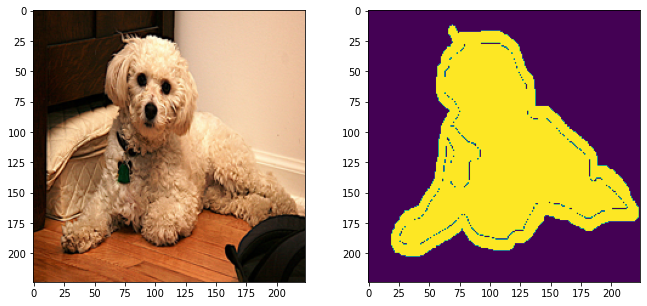

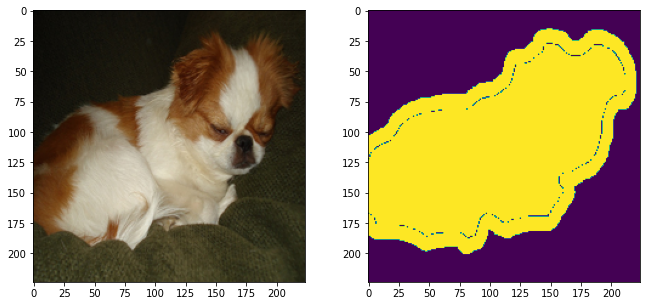

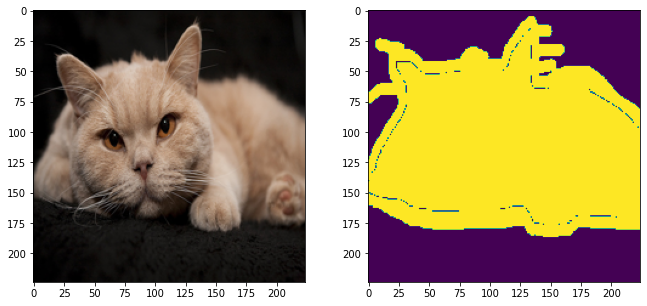

In [61]:
for image, seg_image in validation_dataset.take(3):
    plt.figure(figsize=(11, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image[0])
    plt.subplot(1, 2, 2)
    plt.imshow(seg_image[0, :, :, 0])
    plt.show()

## Model (like U-Net)

In [62]:
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D, Concatenate

In [63]:
def create_model():
    
    inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Contraction
    # Same structrue with VGG16
    conv1_1 = Conv2D(64, 3, 1, 'SAME', activation='relu')(inputs)
    conv1_2 = Conv2D(64, 3, 1, 'SAME', activation='relu')(conv1_1)
    pool1_3 = MaxPooling2D()(conv1_2) # 2by2 pooling

    conv2_1 = Conv2D(128, 3, 1, 'SAME', activation='relu')(pool1_3)
    conv2_2 = Conv2D(128, 3, 1, 'SAME', activation='relu')(conv2_1)
    pool2_3 = MaxPooling2D()(conv2_2)

    conv3_1 = Conv2D(256, 3, 1, 'SAME', activation='relu')(pool2_3)
    conv3_2 = Conv2D(256, 3, 1, 'SAME', activation='relu')(conv3_1)
    conv3_3 = Conv2D(256, 3, 1, 'SAME', activation='relu')(conv3_2)
    pool3_4 = MaxPooling2D()(conv3_3)

    conv4_1 = Conv2D(512, 3, 1, 'SAME', activation='relu')(pool3_4)
    conv4_2 = Conv2D(512, 3, 1, 'SAME', activation='relu')(conv4_1)
    conv4_3 = Conv2D(512, 3, 1, 'SAME', activation='relu')(conv4_2)
    pool4_4 = MaxPooling2D()(conv4_3)

    conv5_1 = Conv2D(512, 3, 1, 'SAME', activation='relu')(pool4_4)
    conv5_2 = Conv2D(512, 3, 1, 'SAME', activation='relu')(conv5_1)
    conv5_3 = Conv2D(512, 3, 1, 'SAME', activation='relu')(conv5_2)
    pool5_4 = MaxPooling2D()(conv5_3)

    # Expansion

    upconv6 = Conv2DTranspose(512, 5, 2, 'SAME', activation='relu')(pool5_4)
    concat6 = Concatenate()([conv5_3, upconv6])
    conv6 = Conv2D(512, 3, 1, 'SAME', activation='relu')(concat6)

    upconv7 = Conv2DTranspose(512, 5, 2, 'SAME', activation='relu')(conv6)
    concat7 = Concatenate()([conv4_3, upconv7])
    conv7 = Conv2D(512, 3, 1, 'SAME', activation='relu')(concat7)

    upconv8 = Conv2DTranspose(256, 5, 2, 'SAME', activation='relu')(conv7)
    concat8 = Concatenate()([conv3_3, upconv8])
    conv8 = Conv2D(256, 3, 1, 'SAME', activation='relu')(concat8)

    upconv9 = Conv2DTranspose(128, 5, 2, 'SAME', activation='relu')(conv8)
    concat9 = Concatenate()([conv2_2, upconv9])
    conv9 = Conv2D(128, 3, 1, 'SAME', activation='relu')(concat9)

    upconv10 = Conv2DTranspose(64, 5, 2, 'SAME', activation='relu')(conv9)
    concat10 = Concatenate()([conv1_2, upconv10])
    conv10 = Conv2D(64, 3, 1, 'SAME', activation='relu')(concat10)

    conv11 = Conv2D(64, 3, 1, 'SAME', activation='relu')(conv10)

    # 1 by 1 convolution
    # channel [0] : segmentation map of probability background 
    # channel [1] : segmentation map of porbability foreground & not classified 
    conv12 = Conv2D(2, 1, 1, 'SAME', activation='softmax')(conv11)

    return tf.keras.Model(inputs=inputs, outputs=conv12)

In [64]:
model = create_model()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 112, 112, 64) 0           conv2d_1[0][0]                   
_______________________________________________________________________________________

In [67]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=steps_per_epoch*10,
    decay_rate=0.4,
    staircase=True
)
model.compile(tf.keras.optimizers.Adam(lr_schedule), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [69]:
model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=N_EPOCHS,
    validation_data=validation_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
148/148 [==============================] - 155s 1s/step - loss: 0.4058 - sparse_categorical_accuracy: 0.8215 - val_loss: 0.3563 - val_sparse_categorical_accuracy: 0.8456
Epoch 2/20
148/148 [==============================] - 155s 1s/step - loss: 0.3496 - sparse_categorical_accuracy: 0.8484 - val_loss: 0.3151 - val_sparse_categorical_accuracy: 0.8668
Epoch 3/20
148/148 [==============================] - 155s 1s/step - loss: 0.3161 - sparse_categorical_accuracy: 0.8649 - val_loss: 0.2993 - val_sparse_categorical_accuracy: 0.8730
Epoch 4/20
148/148 [==============================] - 155s 1s/step - loss: 0.2827 - sparse_categorical_accuracy: 0.8810 - val_loss: 0.2611 - val_sparse_categorical_accuracy: 0.8921
Epoch 5/20
148/148 [==============================] - 155s 1s/step - loss: 0.2626 - sparse_categorical_accuracy: 0.8916 - val_loss: 0.2413 - val_sparse_categorical_accuracy: 0.8995
Epoch 6/20
148/148 [==============================] - 155s 1s/step - loss: 0.2459 - sparse_cate

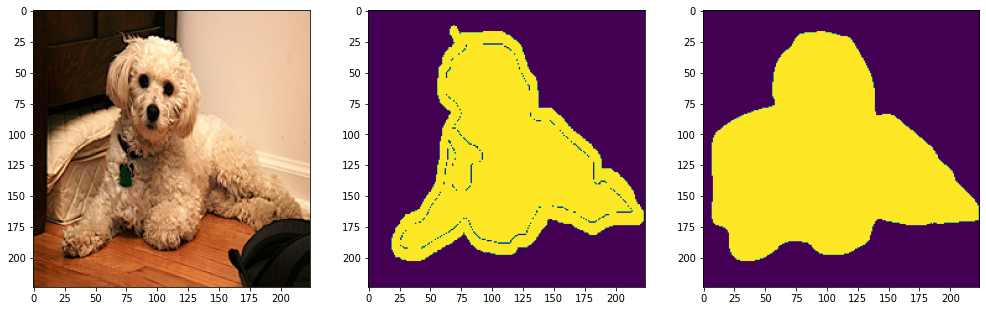

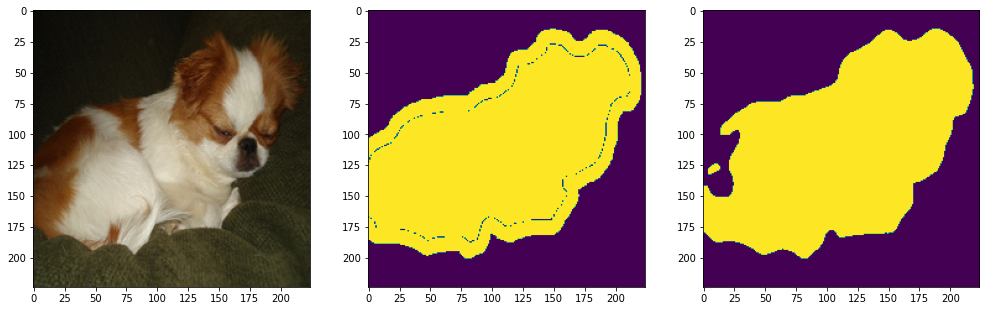

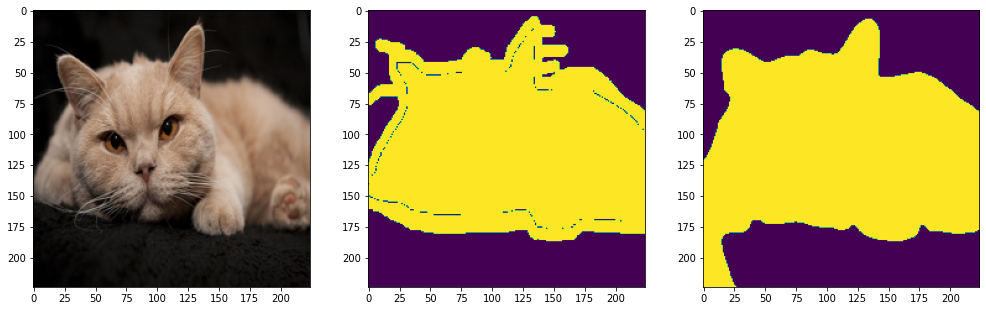

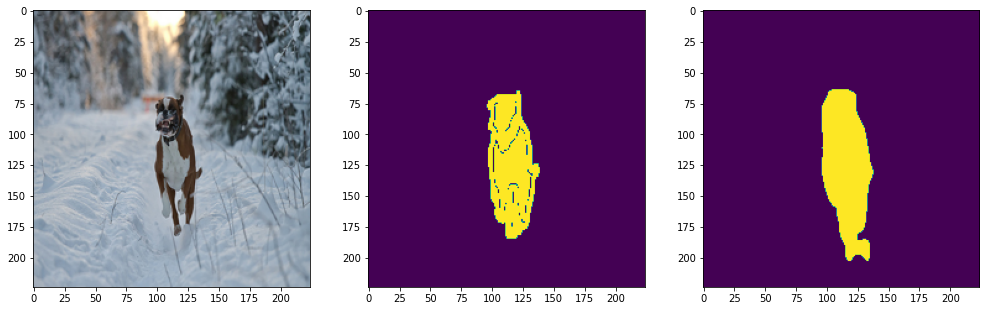

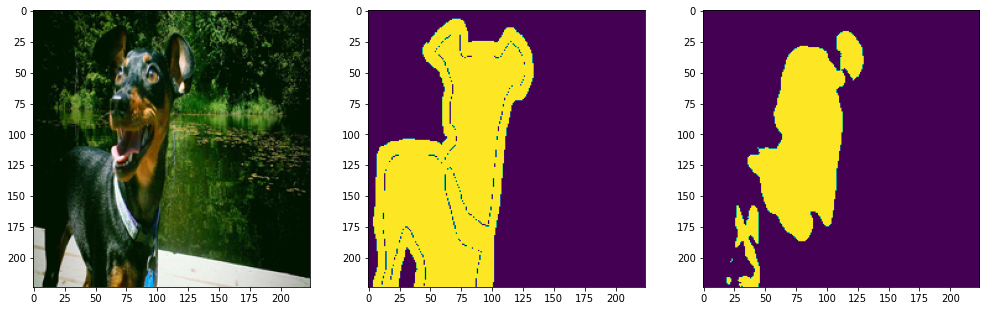

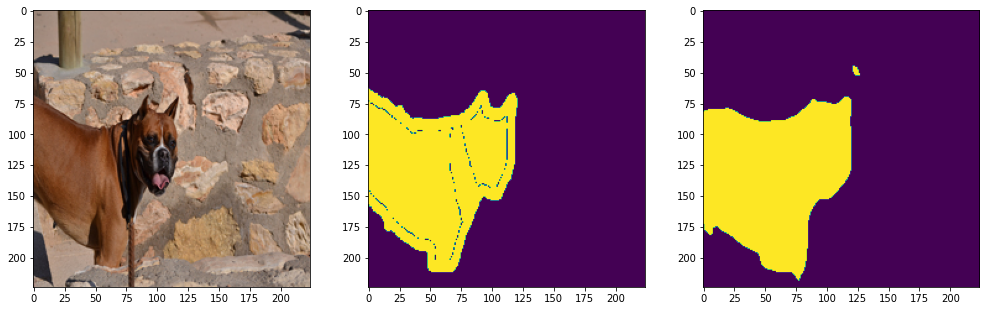

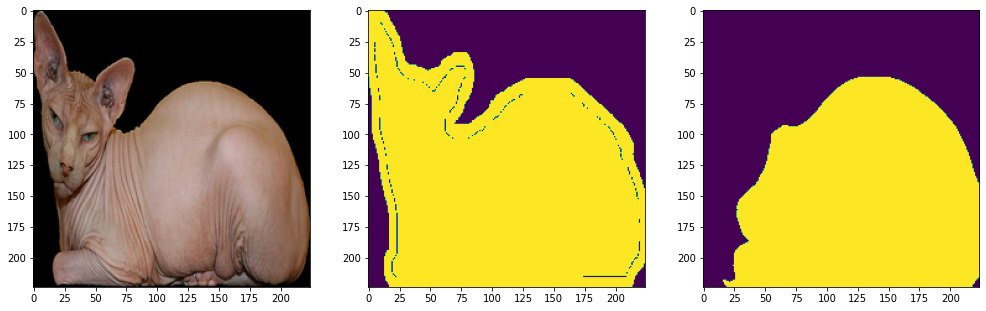

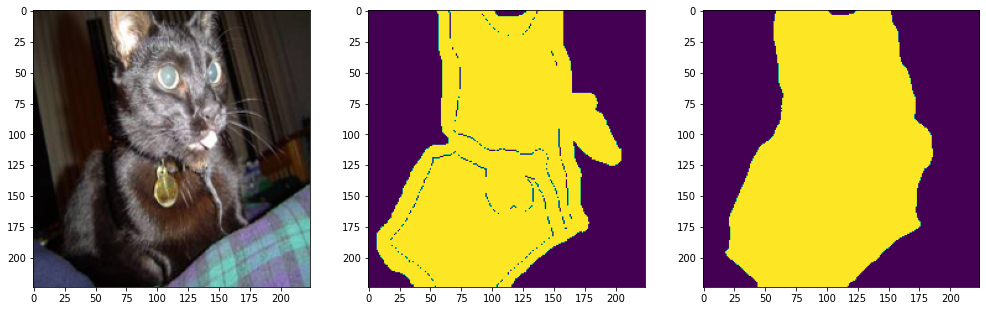

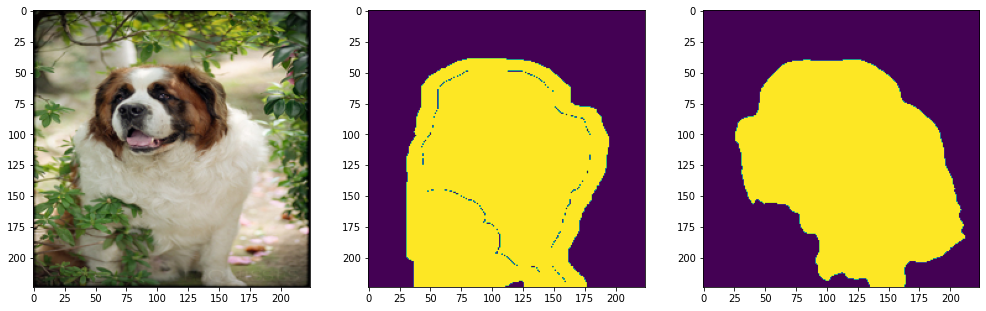

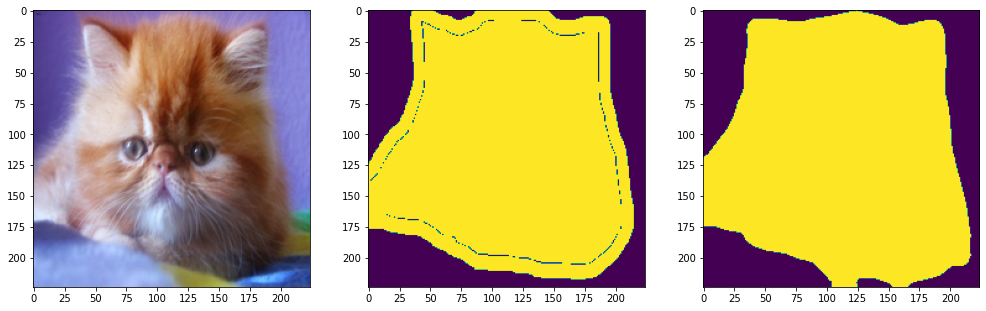

In [70]:
num_images = 10
idx = 0

for image, seg_image in validation_dataset.take(num_images):
    
    plt.figure(figsize=(17, 6*num_images))
    plt.subplot(num_images, 3, idx*3 + 1)
    plt.imshow(image[0])
    plt.subplot(num_images, 3, idx*3 + 2)
    plt.imshow(seg_image[0, :, :, 0], vmin=0, vmax=1)

    plt.subplot(num_images, 3, idx*3 + 3)

    predict = model.predict(image) # channel 1([1]) is prob of foreground

    pred = np.zeros_like(predict)

    threshold = 0.5

    pred[predict >= threshold] = 1
    pred[predict < threshold] = 0
    plt.imshow(pred[0, :, :, 1])
    plt.show()

    idx += 1   

In [75]:
## IoU : Intersection of Union 

avg_iou = 0
n = 0

for images, labels in validation_dataset.take(validation_steps):
    
    preds = model.predict(images)
    preds[preds >= 0.5] = 1
    preds[preds < 0.5] = 0

    psum = labels[..., 0] + preds[..., 1]

    union = np.array(psum)
    union[union > 1] = 1.
    union = np.sum(union, axis=1)
    union = np.sum(union, axis=1)

    inter = np.array(psum)
    inter[inter==1] = 0.
    inter[inter > 1] = 1.
    inter = np.sum(inter, axis=1)
    inter = np.sum(inter, axis=1)

    iou = inter / union
    avg_iou += np.sum(iou) / N_VALIDATION

print(avg_iou)


0.8409983657188048


## Model : like U-Net using pretrained VGG

In [76]:
from tensorflow.keras.utils import get_file

In [77]:
fname = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
url = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weight_path = get_file(fname, url)

58892288/58889256 [==============================] - 2s 0us/step


In [78]:
def create_model():
    inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Contraction (Encoder)
    # Same structrue with VGG16
    # Initialize with weights of pretrained vgg16
    conv1_1 = Conv2D(64, 3, 1, 'SAME', activation='relu')(inputs)
    conv1_2 = Conv2D(64, 3, 1, 'SAME', activation='relu')(conv1_1)
    pool1_3 = MaxPooling2D()(conv1_2) # 2by2 pooling

    conv2_1 = Conv2D(128, 3, 1, 'SAME', activation='relu')(pool1_3)
    conv2_2 = Conv2D(128, 3, 1, 'SAME', activation='relu')(conv2_1)
    pool2_3 = MaxPooling2D()(conv2_2)

    conv3_1 = Conv2D(256, 3, 1, 'SAME', activation='relu')(pool2_3)
    conv3_2 = Conv2D(256, 3, 1, 'SAME', activation='relu')(conv3_1)
    conv3_3 = Conv2D(256, 3, 1, 'SAME', activation='relu')(conv3_2)
    pool3_4 = MaxPooling2D()(conv3_3)

    conv4_1 = Conv2D(512, 3, 1, 'SAME', activation='relu')(pool3_4)
    conv4_2 = Conv2D(512, 3, 1, 'SAME', activation='relu')(conv4_1)
    conv4_3 = Conv2D(512, 3, 1, 'SAME', activation='relu')(conv4_2)
    pool4_4 = MaxPooling2D()(conv4_3)

    conv5_1 = Conv2D(512, 3, 1, 'SAME', activation='relu')(pool4_4)
    conv5_2 = Conv2D(512, 3, 1, 'SAME', activation='relu')(conv5_1)
    conv5_3 = Conv2D(512, 3, 1, 'SAME', activation='relu')(conv5_2)
    pool5_4 = MaxPooling2D()(conv5_3)

    # loading vgg16 pretrained weights
    vgg = tf.keras.Model(inputs, pool5_4)
    vgg.load_weights(weight_path)

    # Expansion (Decoder)
    # Random Initialize
    upconv6 = Conv2DTranspose(512, 5, 2, 'SAME', activation='relu')(pool5_4)
    concat6 = Concatenate()([conv5_3, upconv6])
    conv6 = Conv2D(512, 3, 1, 'SAME', activation='relu')(concat6)

    upconv7 = Conv2DTranspose(512, 5, 2, 'SAME', activation='relu')(conv6)
    concat7 = Concatenate()([conv4_3, upconv7])
    conv7 = Conv2D(512, 3, 1, 'SAME', activation='relu')(concat7)

    upconv8 = Conv2DTranspose(256, 5, 2, 'SAME', activation='relu')(conv7)
    concat8 = Concatenate()([conv3_3, upconv8])
    conv8 = Conv2D(256, 3, 1, 'SAME', activation='relu')(concat8)

    upconv9 = Conv2DTranspose(128, 5, 2, 'SAME', activation='relu')(conv8)
    concat9 = Concatenate()([conv2_2, upconv9])
    conv9 = Conv2D(128, 3, 1, 'SAME', activation='relu')(concat9)

    upconv10 = Conv2DTranspose(64, 5, 2, 'SAME', activation='relu')(conv9)
    concat10 = Concatenate()([conv1_2, upconv10])
    conv10 = Conv2D(64, 3, 1, 'SAME', activation='relu')(concat10)

    conv11 = Conv2D(64, 3, 1, 'SAME', activation='relu')(conv10)

    # 1 by 1 convolution
    # channel [0] : segmentation map of probability background 
    # channel [1] : segmentation map of porbability foreground & not classified 
    conv12 = Conv2D(2, 1, 1, 'SAME', activation='softmax')(conv11)

    return tf.keras.Model(inputs=inputs, outputs=conv12)

In [79]:
model = create_model()
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 224, 224, 64) 36928       conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 112, 112, 64) 0           conv2d_21[0][0]                  
_______________________________________________________________________________________

In [80]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=steps_per_epoch*10,
    decay_rate=0.4,
    staircase=True
)
model.compile(tf.keras.optimizers.Adam(lr_schedule), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [81]:
model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=N_EPOCHS,
    validation_data=validation_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
148/148 [==============================] - 155s 1s/step - loss: 0.3352 - sparse_categorical_accuracy: 0.8478 - val_loss: 0.1819 - val_sparse_categorical_accuracy: 0.9313
Epoch 2/20
148/148 [==============================] - 155s 1s/step - loss: 0.1660 - sparse_categorical_accuracy: 0.9374 - val_loss: 0.1461 - val_sparse_categorical_accuracy: 0.9451
Epoch 3/20
148/148 [==============================] - 154s 1s/step - loss: 0.1437 - sparse_categorical_accuracy: 0.9464 - val_loss: 0.1487 - val_sparse_categorical_accuracy: 0.9438
Epoch 4/20
148/148 [==============================] - 154s 1s/step - loss: 0.1228 - sparse_categorical_accuracy: 0.9545 - val_loss: 0.1239 - val_sparse_categorical_accuracy: 0.9545
Epoch 5/20
148/148 [==============================] - 154s 1s/step - loss: 0.1108 - sparse_categorical_accuracy: 0.9592 - val_loss: 0.1304 - val_sparse_categorical_accuracy: 0.9524
Epoch 6/20
148/148 [==============================] - 154s 1s/step - loss: 0.1040 - sparse_cate

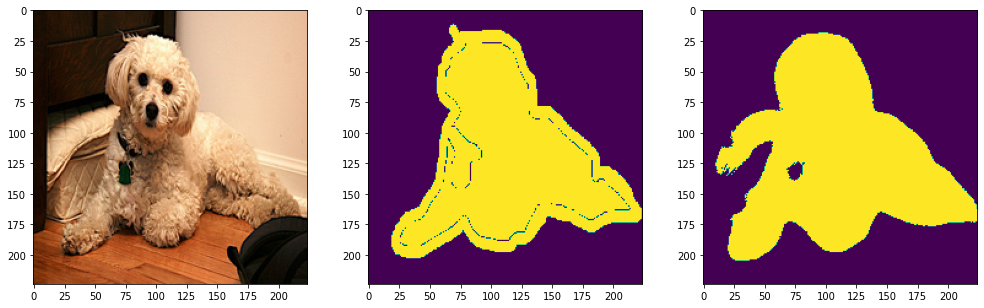

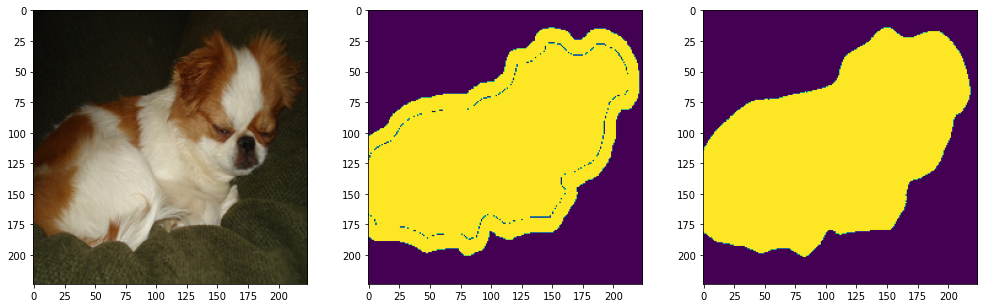

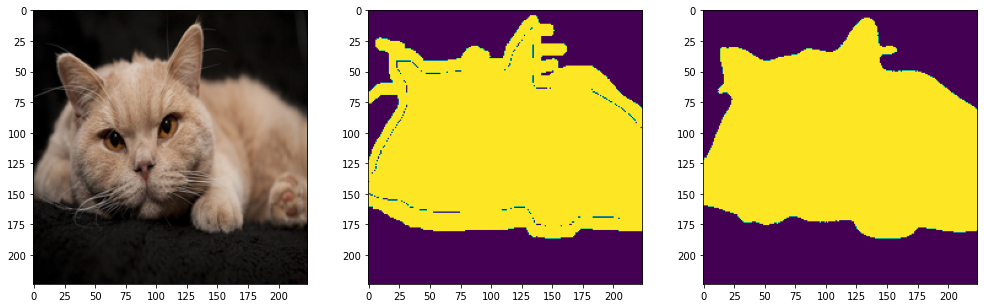

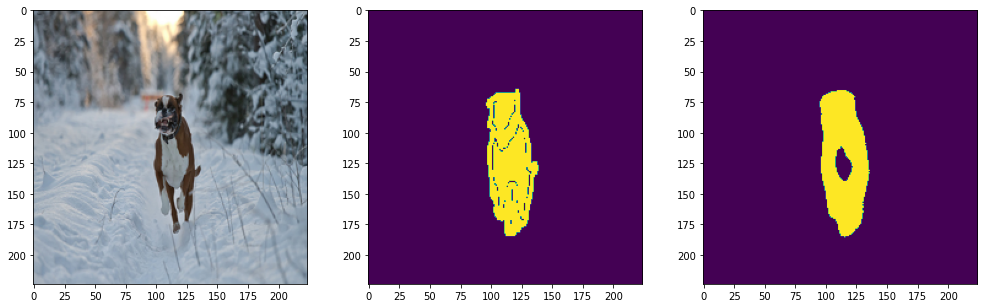

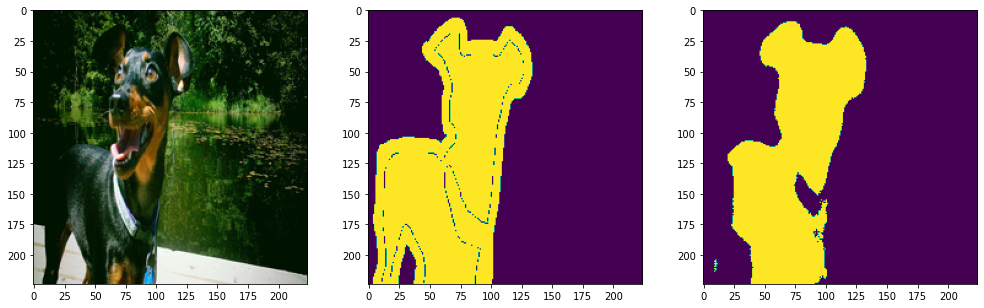

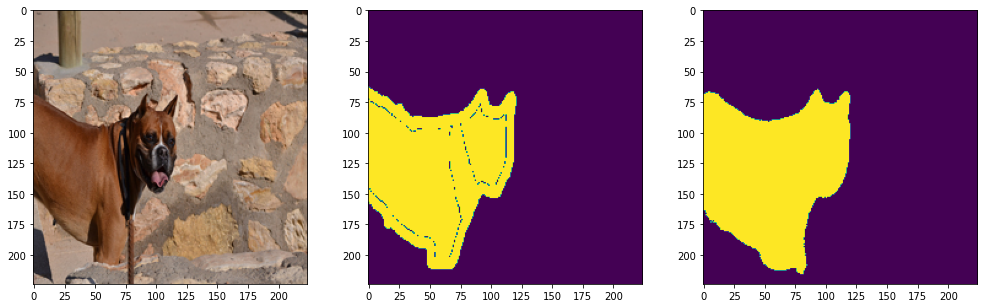

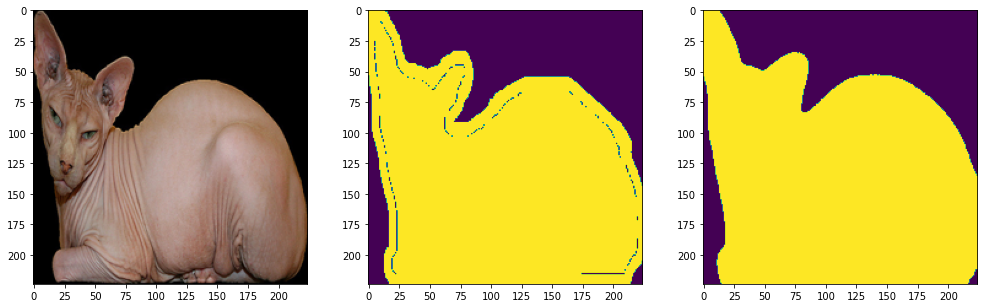

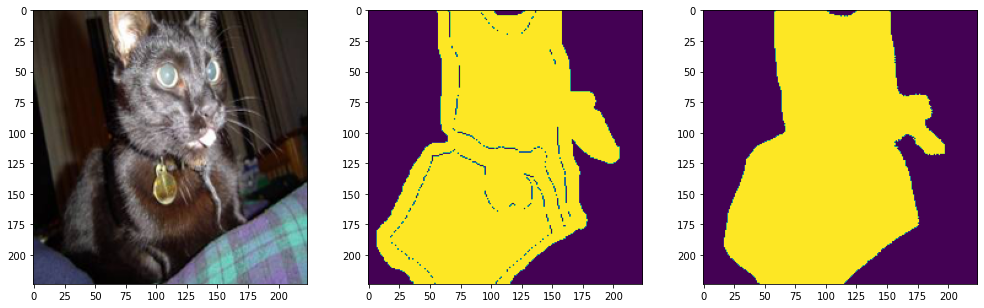

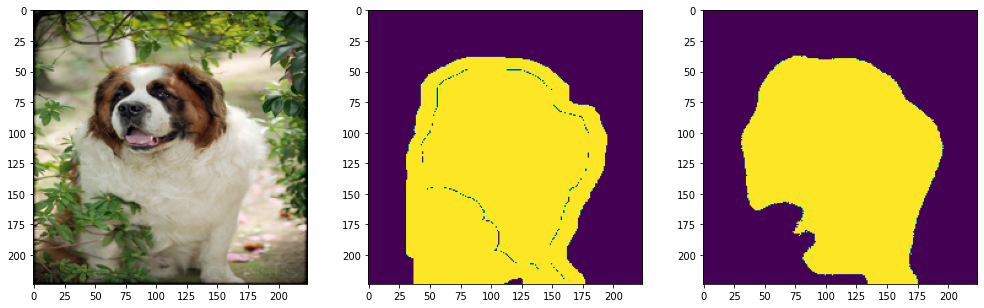

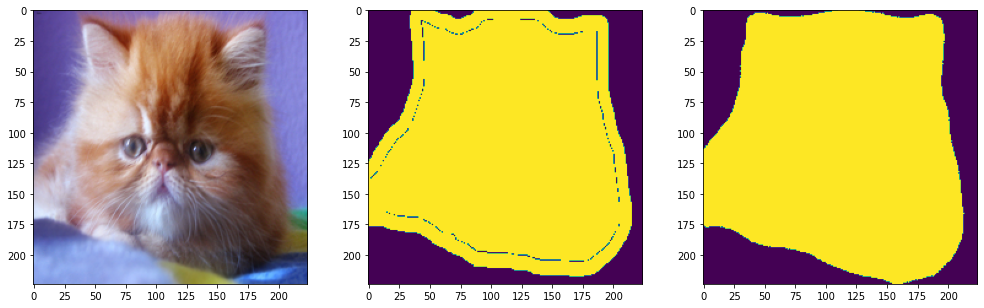

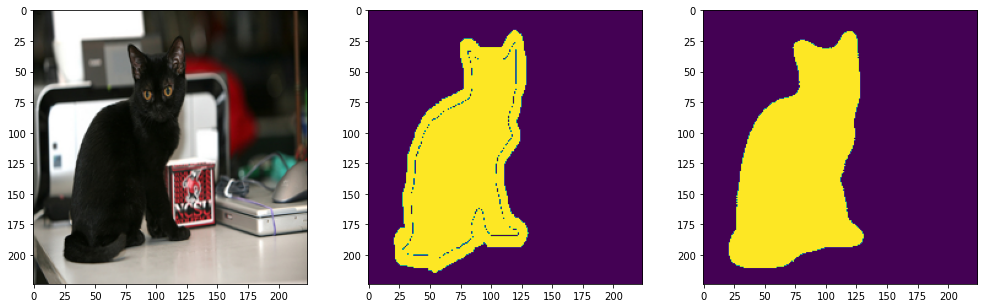

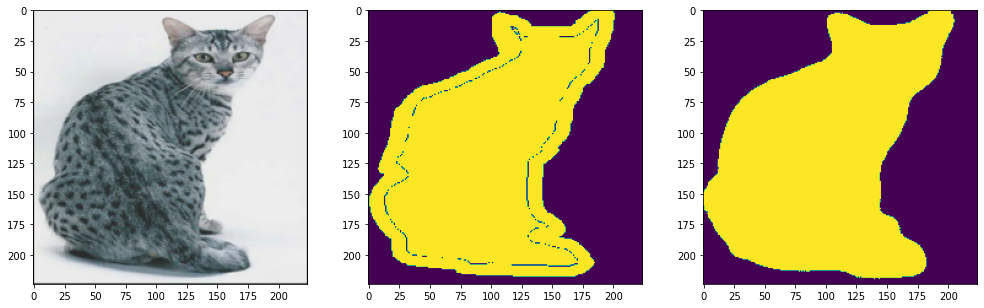

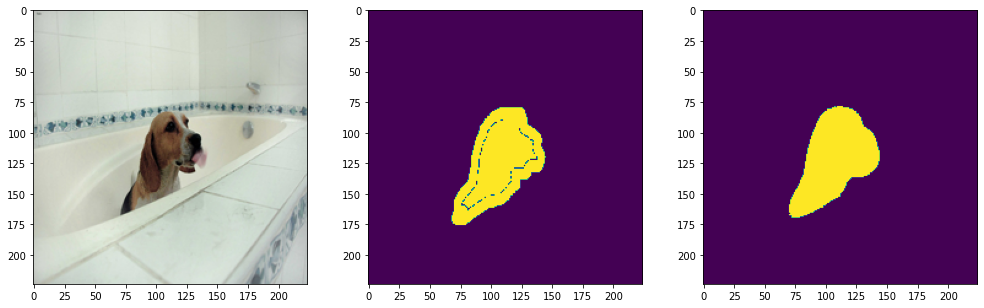

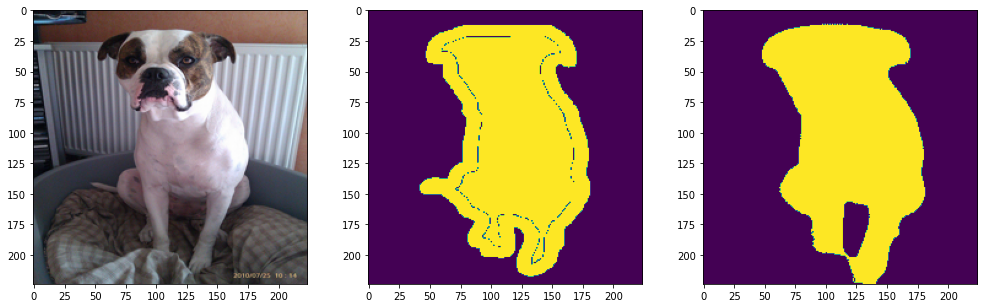

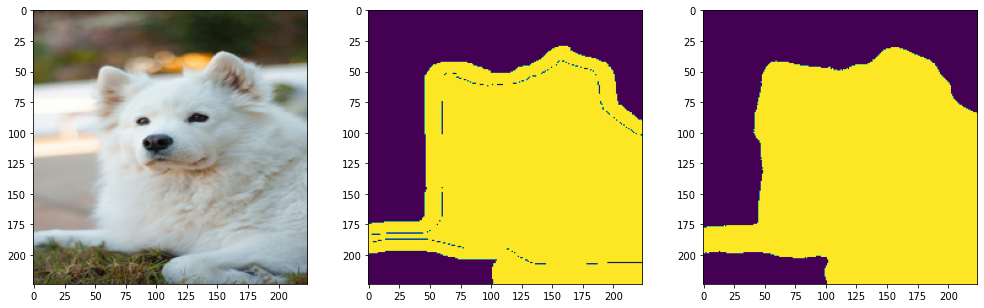

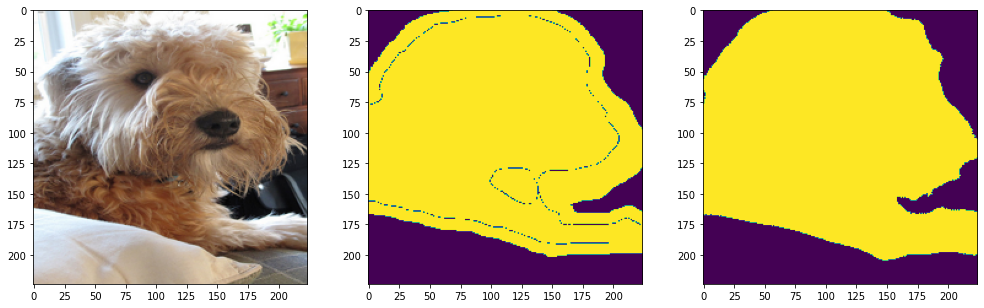

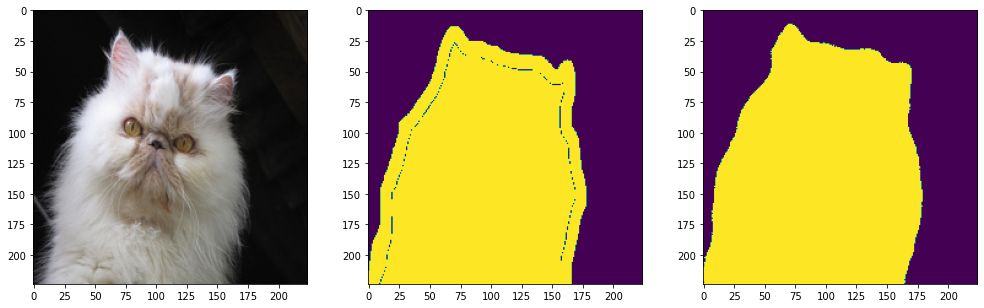

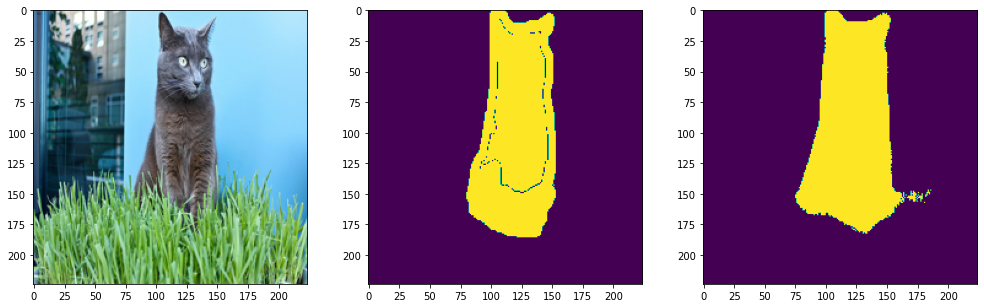

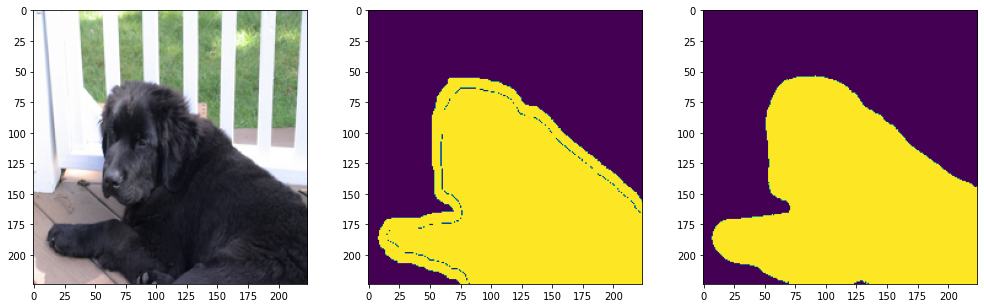

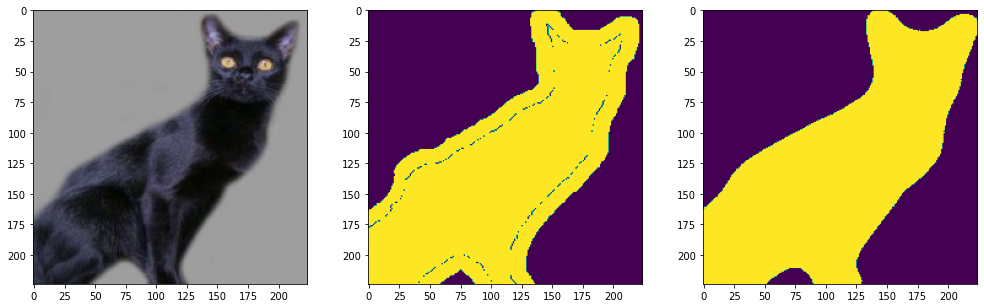

In [82]:
num_images = 20
idx = 0

for image, seg_image in validation_dataset.take(num_images):
    
    plt.figure(figsize=(17, 6*num_images))
    plt.subplot(num_images, 3, idx*3 + 1)
    plt.imshow(image[0])
    plt.subplot(num_images, 3, idx*3 + 2)
    plt.imshow(seg_image[0, :, :, 0], vmin=0, vmax=1)

    plt.subplot(num_images, 3, idx*3 + 3)

    predict = model.predict(image) # channel 1([1]) is prob of foreground

    pred = np.zeros_like(predict)

    threshold = 0.5

    pred[predict >= threshold] = 1
    pred[predict < threshold] = 0
    plt.imshow(pred[0, :, :, 1])
    plt.show()

    idx += 1

In [83]:
## IoU : Intersection of Union 

avg_iou = 0
n = 0

for images, labels in validation_dataset.take(validation_steps):
    
    preds = model.predict(images)
    preds[preds >= 0.5] = 1
    preds[preds < 0.5] = 0

    psum = labels[..., 0] + preds[..., 1]

    union = np.array(psum)
    union[union > 1] = 1.
    union = np.sum(union, axis=1)
    union = np.sum(union, axis=1)

    inter = np.array(psum)
    inter[inter==1] = 0.
    inter[inter > 1] = 1.
    inter = np.sum(inter, axis=1)
    inter = np.sum(inter, axis=1)

    iou = inter / union
    avg_iou += np.sum(iou) / N_VALIDATION

print(avg_iou)

0.900721054181804


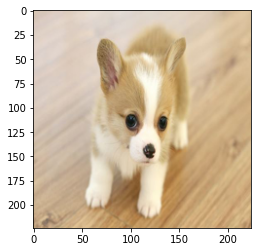

In [94]:
image = Image.open('dog.jpg')
image = image.resize((IMG_SIZE, IMG_SIZE))
image = np.array(image)
image = image / 255.

plt.imshow(image)
plt.show()

In [95]:
image = np.reshape(image, (1, IMG_SIZE, IMG_SIZE, 3))

prediction = model.predict(image)
prediction.shape

(1, 224, 224, 2)

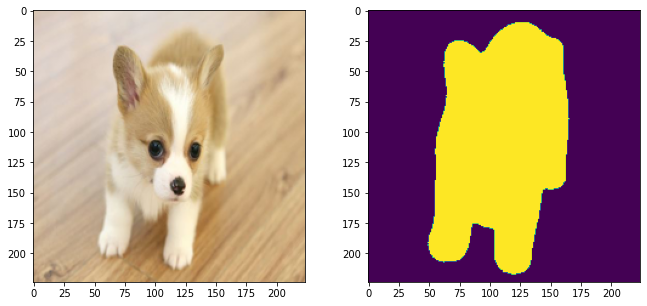

In [97]:
pred = np.zeros_like(prediction)

threshold = 0.5

pred[prediction >= threshold] = 1
pred[prediction < threshold] = 0

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.imshow(image[0])
plt.subplot(1, 2, 2)
plt.imshow(pred[0, :, :, 1])
plt.show()

In [98]:
def get_image(path):
    
    image = Image.open(path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    image = np.array(image)
    image = image / 255.

    return image

def reshape_image_for_input(image):

    return np.reshape(image, (1, IMG_SIZE, IMG_SIZE, 3))


def show_prediction(image, prediction):
    
    pred = np.zeros_like(prediction)

    threshold = 0.5

    pred[prediction >= threshold] = 1
    pred[prediction < threshold] = 0

    plt.figure(figsize=(11, 5))
    plt.subplot(1, 2, 1)
    if len(image.shape) == 4:
        plt.imshow(image[0])
    else:
        plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(pred[0, :, :, 1])
    plt.show()

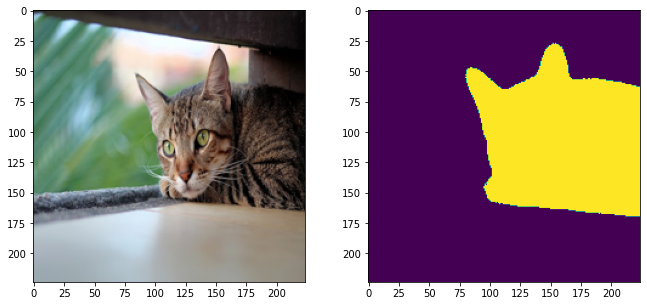

In [99]:
image = get_image('cat.jpg')

image = reshape_image_for_input(image)

prediction = model.predict(image)

show_prediction(image, prediction)

In [100]:
def predict_and_show_result(model, input_image_path):

    input_image = get_image(input_image_path)

    input_image = reshape_image_for_input(input_image)

    prediction = model.predict(input_image)

    show_prediction(input_image, prediction)

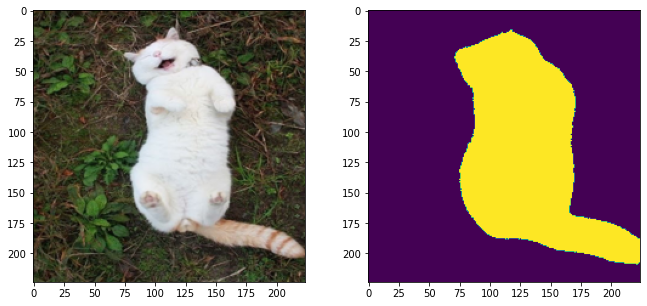

In [101]:
predict_and_show_result(model, 'cat-2.jpg')